In [2]:
# imports

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import matplotlib.ticker as ticker

In [3]:
# connect to database
con = sqlite3.connect('BostonHousing-allyears.db')

In [4]:
# define queries
# for a zipcode to be considered as a part of the residential distribution, it needs to have at least 50
# residential buildings. This cap simplifies the distribution and removes outlier zip codes

query_zip2004 = """

select * from (
    select zipcode, count(*) as total_homes
    from Buildings
    where PID in (select PID from Assessments where year=2004)
    group by zipcode
)
where total_homes>=50


"""

query_zip2023 = """

select * from (
    select zipcode, count(*) as total_homes
    from Buildings
    where PID in (select PID from Assessments where year=2023)
    group by zipcode
)
where total_homes>=50


"""

In [5]:
# create dataframe 
zip_data04 = pd.read_sql_query(query_zip2004, con)
zip_data04['zipcode'] = zip_data04.zipcode.astype('str')
zip_data04['zipcode'] = zip_data04['zipcode'].str.zfill(5) # add a leading zero to look like Boston zipcodes


zip_data04

,zipcode,total_homes
0,02108,1786
1,02109,1588
2,02110,1322
3,02111,1595
4,02113,1825
5,02114,3634
6,02115,4192
7,02116,7449
8,02118,5469
9,02119,4957


In [6]:
# create dataframe 
zip_data23 = pd.read_sql_query(query_zip2023, con)
zip_data23['zipcode'] = zip_data23.zipcode.astype('str')
zip_data23['zipcode'] = zip_data23['zipcode'].str.zfill(5) # add a leading zero to look like Boston zipcodes


zip_data23

,zipcode,total_homes
0,02108,2162
1,02109,1847
2,02110,2488
3,02111,2893
4,02113,2348
5,02114,5356
6,02115,5315
7,02116,9460
8,02118,9371
9,02119,6089


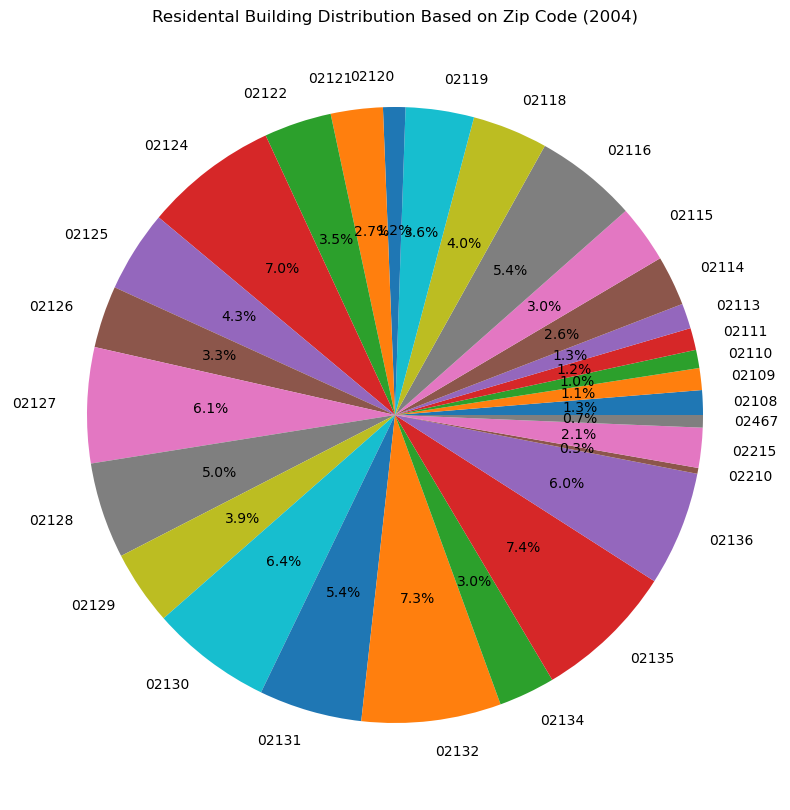

In [7]:
# make pie chart for 2004
plt.figure(figsize=(10 , 10), dpi=100)
plt.pie(zip_data04.total_homes, labels = zip_data04.zipcode, autopct='%1.1f%%')
plt.title('Residental Building Distribution Based on Zip Code (2004)')
plt.savefig('Distrib2004')
plt.show()

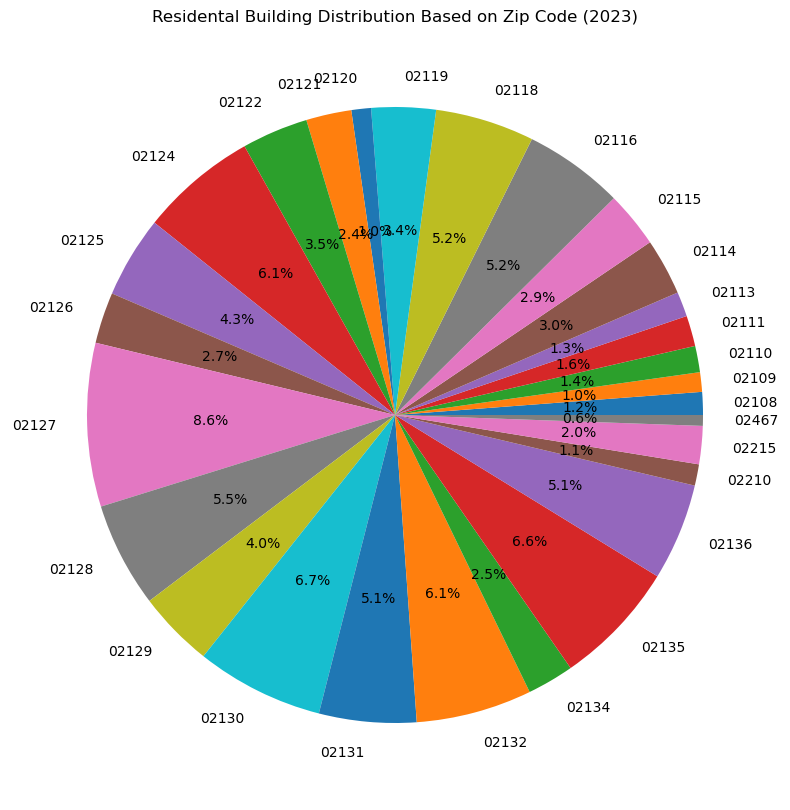

In [8]:
# make pie chart for 2023
plt.figure(figsize=(10 , 10), dpi=100)
plt.pie(zip_data23.total_homes, labels = zip_data23.zipcode, autopct='%1.1f%%')
plt.title('Residental Building Distribution Based on Zip Code (2023)')
plt.savefig('Distrib2023')
plt.show()

In [9]:
# create dataframes for each ward 
ward1 = pd.read_sql_query("select * from ward1", con)
ward2 = pd.read_sql_query("select * from ward2", con)
ward3 = pd.read_sql_query("select * from ward3", con)
ward4 = pd.read_sql_query("select * from ward4", con)
ward5 = pd.read_sql_query("select * from ward5", con)
ward6 = pd.read_sql_query("select * from ward6", con)
ward7 = pd.read_sql_query("select * from ward7", con)
ward8 = pd.read_sql_query("select * from ward8", con)
ward9 = pd.read_sql_query("select * from ward9", con)
ward10 = pd.read_sql_query("select * from ward10", con)
ward11 = pd.read_sql_query("select * from ward11", con)
ward12 = pd.read_sql_query("select * from ward12", con)
ward13 = pd.read_sql_query("select * from ward13", con)
ward14 = pd.read_sql_query("select * from ward14", con)
ward15 = pd.read_sql_query("select * from ward15", con)
ward16 = pd.read_sql_query("select * from ward16", con)
ward17 = pd.read_sql_query("select * from ward17", con)
ward18 = pd.read_sql_query("select * from ward18", con)
ward19 = pd.read_sql_query("select * from ward19", con)
ward20 = pd.read_sql_query("select * from ward20", con)
ward21 = pd.read_sql_query("select * from ward21", con)
ward22 = pd.read_sql_query("select * from ward22", con)

In [10]:
# 2022 was an incomplete data set, must be dropped or else average skewed
ward1.drop(ward1.index[18], inplace = True)
ward2.drop(ward2.index[18], inplace = True)
ward3.drop(ward3.index[18], inplace = True)
ward4.drop(ward4.index[18], inplace = True)
ward5.drop(ward5.index[18], inplace = True)
ward6.drop(ward6.index[18], inplace = True)
ward7.drop(ward7.index[18], inplace = True)
ward8.drop(ward8.index[18], inplace = True)
ward9.drop(ward9.index[18], inplace = True)
ward10.drop(ward10.index[18], inplace = True)
ward11.drop(ward11.index[18], inplace = True)
ward12.drop(ward12.index[18], inplace = True)
ward13.drop(ward13.index[18], inplace = True)
ward14.drop(ward14.index[18], inplace = True)
ward15.drop(ward15.index[18], inplace = True)
ward16.drop(ward16.index[18], inplace = True)
ward17.drop(ward17.index[18], inplace = True)
ward18.drop(ward18.index[18], inplace = True)
ward19.drop(ward19.index[18], inplace = True)
ward20.drop(ward20.index[18], inplace = True)
ward21.drop(ward21.index[18], inplace = True)
ward22.drop(ward22.index[18], inplace = True)

In [11]:
ward4

,average_price,year,PID
0,5099760.0,2004,0400001000
1,5367280.0,2005,0400001000
2,5878496.0,2006,0400001000
3,7044391.0,2007,0400001000
4,7366011.0,2008,0400001000
5,9989877.0,2009,0400001000
6,9420865.0,2010,0401878000
7,9120233.0,2011,0402796000
8,9409852.0,2012,0400001000
9,10469542.0,2013,0400001000


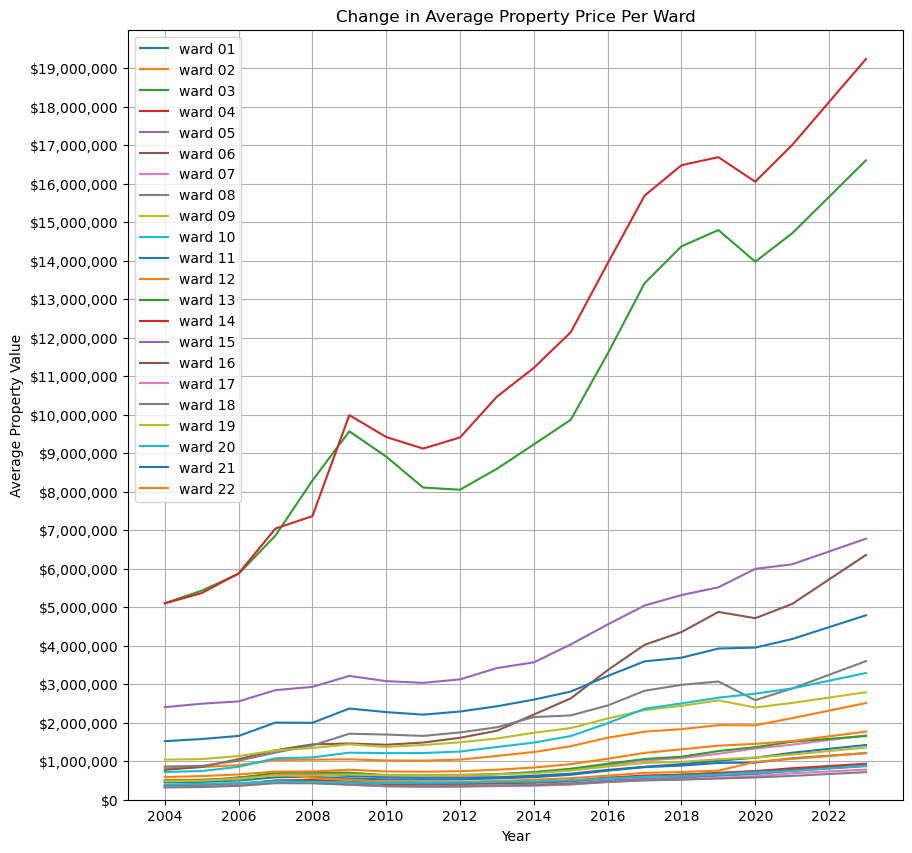

In [13]:
plt.figure(figsize=(10 , 10), dpi=100)
plt.plot(ward1.year, ward1.average_price, label="ward 01")
plt.plot(ward2.year, ward2.average_price, label="ward 02")
plt.plot(ward3.year, ward3.average_price, label="ward 03")
plt.plot(ward4.year, ward4.average_price, label="ward 04")
plt.plot(ward5.year, ward5.average_price, label="ward 05")
plt.plot(ward6.year, ward6.average_price, label="ward 06")
plt.plot(ward7.year, ward7.average_price, label="ward 07")
plt.plot(ward8.year, ward8.average_price, label="ward 08")
plt.plot(ward9.year, ward9.average_price, label="ward 09")
plt.plot(ward10.year, ward10.average_price, label="ward 10")
plt.plot(ward11.year, ward11.average_price, label="ward 11")
plt.plot(ward12.year, ward12.average_price, label="ward 12")
plt.plot(ward13.year, ward13.average_price, label="ward 13")
plt.plot(ward14.year, ward14.average_price, label="ward 14")
plt.plot(ward15.year, ward15.average_price, label="ward 15")
plt.plot(ward16.year, ward16.average_price, label="ward 16")
plt.plot(ward17.year, ward17.average_price, label="ward 17")
plt.plot(ward18.year, ward18.average_price, label="ward 18")
plt.plot(ward19.year, ward19.average_price, label="ward 19")
plt.plot(ward20.year, ward20.average_price, label="ward 20")
plt.plot(ward21.year, ward21.average_price, label="ward 21")
plt.plot(ward22.year, ward22.average_price, label="ward 22")
plt.ylim(0, 20000000)
plt.xlim(2003, 2024)
plt.xticks(np.arange(2004, 2023, 2.0))
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(np.arange(0, 20000000, 1000000))
plt.title("Change in Average Property Price Per Ward")
plt.xlabel("Year")
plt.ylabel("Average Property Value")
plt.legend()
plt.grid()
plt.savefig('ChangeWard')
plt.show()